In [1]:
import os
os.chdir('../..')
import numpy as np
import pickle
from tqdm import tqdm

In [2]:
from molexplain.vis import molecule_importance
from molexplain.utils import MODELS_PATH
from molexplain.train import DEVICE

RDKit WARNING: [10:12:44] Enabling RDKit 2019.09.3 jupyter extensions
Using backend: pytorch


In [3]:
import torch
model_pt = os.path.join(MODELS_PATH, 'herg_noHs.pt')

from molexplain.net import MPNNPredictor

model = MPNNPredictor(node_in_feats=49,
                      edge_in_feats=10,
                      global_feats=4,
                      n_tasks=1).to(DEVICE) 
model.load_state_dict(torch.load(model_pt,
                                 map_location=DEVICE))

<All keys matched successfully>

In [4]:
from rdkit.Chem import MolFromSmiles

### https://link.springer.com/chapter/10.1007/7355_2014_38

In [7]:
# Series one, not too good
mol = MolFromSmiles("CC(C(N)C(=O)N1CCC(F)C1)C1=CC=C(C=C1)C1=CC=C(F)C=C1")

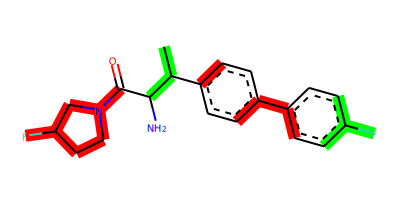

In [9]:
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

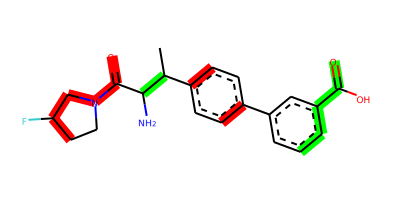

In [11]:
mol = MolFromSmiles("CC(C(N)C(=O)N1CCC(F)C1)C1=CC=C(C=C1)C1=CC=CC(=C1)C(O)=O")
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-3,
                                                      addHs=False)
img

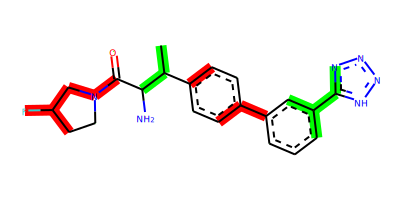

In [13]:
mol = MolFromSmiles("CC(C(N)C(=O)N1CCC(F)C1)C1=CC=C(C=C1)C1=CC=CC(=C1)C1=NN=NN1")
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

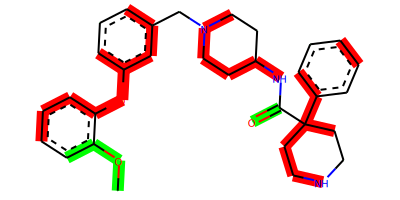

In [14]:
## Second series, not too good
mol = MolFromSmiles("COC1=CC=CC=C1OC1=CC(CN2CCC(CC2)NC(=O)C2(CCNCC2)C2=CC=CC=C2)=CC=C1") #active
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

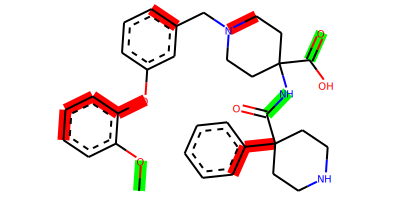

In [16]:
mol = MolFromSmiles("COC1=CC=CC=C1OC1=CC(CN2CCC(CC2)(NC(=O)C2(CCNCC2)C2=CC=CC=C2)C(O)=O)=CC=C1") # inactive
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-3,
                                                      addHs=False)
img

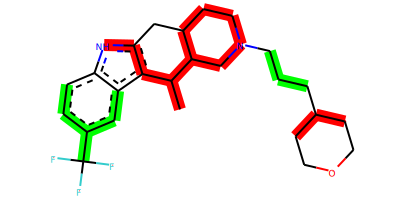

In [18]:
## Third series
mol = MolFromSmiles("C[C@@H]1[C@H]2CN(CCCC3CCOCC3)CC[C@@H]2CC2=C1C1=C(N2)C=CC(=C1)C(F)(F)F") #HERG ACTIVE
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

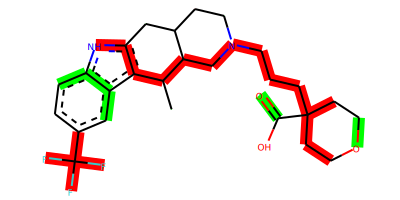

In [19]:
mol = MolFromSmiles("C[C@@H]1[C@H]2CN(CCCC3(CCOCC3)C(O)=O)CC[C@@H]2CC2=C1C1=C(N2)C=CC(=C1)C(F)(F)F") #HERG INACTIVE
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

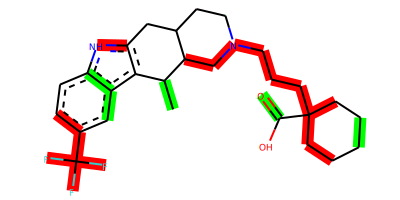

In [20]:
mol = MolFromSmiles("C[C@@H]1[C@H]2CN(CCCC3(CCCCC3)C(O)=O)CC[C@@H]2CC2=C1C1=C(N2)C=CC(=C1)C(F)(F)F") #HERG INACTIVE
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

### https://www.sciencedirect.com/science/article/pii/S0960894X06006615

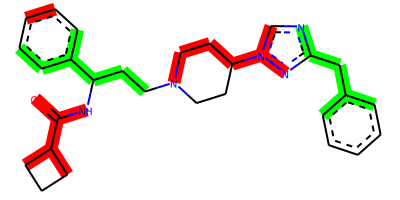

In [21]:
## first series
mol = MolFromSmiles("O=C(N[C@@H](CCN1CCC(CC1)N1C=NC(CC2=CC=CC=C2)=N1)C1=CC=CC=C1)C1CCC1") #HERG ACTIVE
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

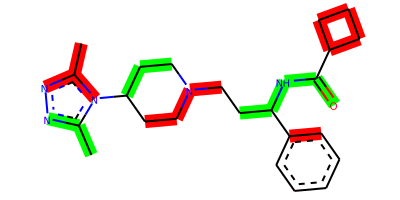

In [22]:
mol = mol = MolFromSmiles("CC1=NN=C(C)N1C1CCN(CC[C@H](NC(=O)C2CCC2)C2=CC=CC=C2)CC1") #HERG INACTIVE
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

### https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4593700/

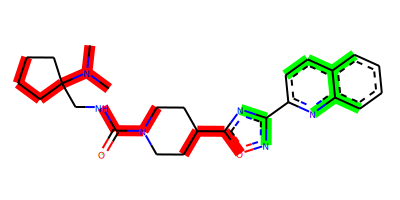

In [23]:
# first series
mol = MolFromSmiles('CN(C)C1(CNC(=O)N2CCC(CC2)C2=NC(=NO2)C2=NC3=CC=CC=C3C=C2)CCCC1') # inactive
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

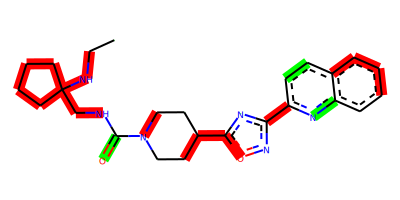

In [24]:
mol = MolFromSmiles("CCNC1(CNC(=O)N2CCC(CC2)C2=NC(=NO2)C2=NC3=CC=CC=C3C=C2)CCCC1") # inactive
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

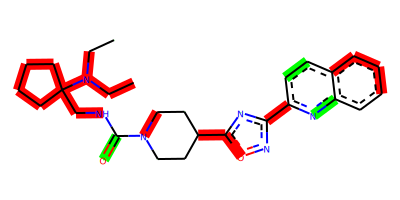

In [25]:
mol = MolFromSmiles("CCN(CC)C1(CNC(=O)N2CCC(CC2)C2=NC(=NO2)C2=NC3=CC=CC=C3C=C2)CCCC1") # active
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

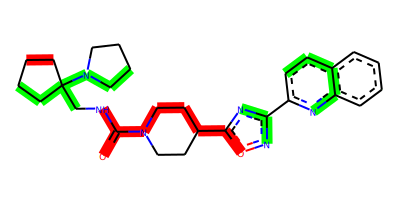

In [26]:
mol = MolFromSmiles('O=C(NCC1(CCCC1)N1CCCC1)N1CCC(CC1)C1=NC(=NO1)C1=NC2=CC=CC=C2C=C1') # blocker
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

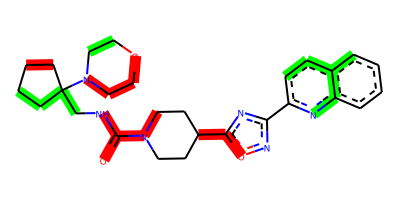

In [27]:
mol = MolFromSmiles("O=C(NCC1(CCCC1)N1CCOCC1)N1CCC(CC1)C1=NC(=NO1)C1=NC2=CC=CC=C2C=C1")
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

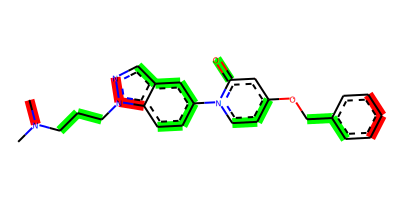

In [28]:
# second series
mol = MolFromSmiles("CN(C)CCCN1N=CC2=C1C=CC(=C2)N1C=CC(OCC2=CC=CC=C2)=CC1=O") # blocker
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

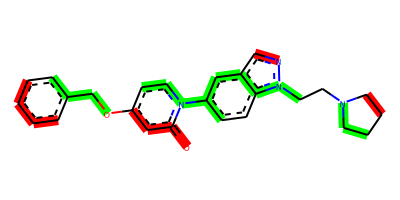

In [29]:
mol = MolFromSmiles("O=C1C=C(OCC2=CC=CC=C2)C=CN1C1=CC=C2N(CCN3CCCC3)N=CC2=C1") # blocker
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

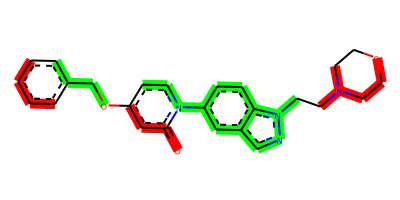

In [30]:
mol = MolFromSmiles("O=C1C=C(OCC2=CC=CC=C2)C=CN1C1=CC2=C(C=C1)N(CCN1CCOCC1)N=C2") # non-blocker
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

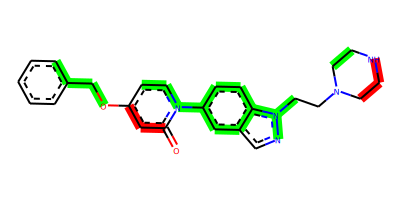

In [32]:
mol = MolFromSmiles("O=C1C=C(OCC2=CC=CC=C2)C=CN1C1=CC2=C(C=C1)N(CCN1CCNCC1)N=C2") # non-blocker
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-3,
                                                      addHs=False)
img

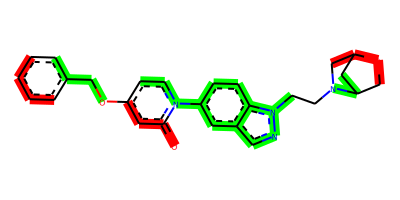

In [34]:
mol = MolFromSmiles("O=C1C=C(OCC2=CC=CC=C2)C=CN1C1=CC2=C(C=C1)N(CCN1CC3CC1CO3)N=C2") # non-blocker
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

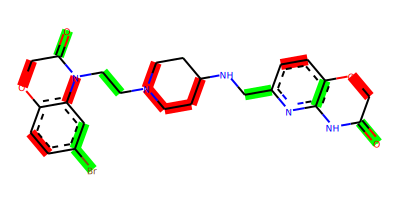

In [35]:
# third series
mol = MolFromSmiles("BrC1=CC=C2OCC(=O)N(CCN3CCC(CC3)NCC3=CC=C4OCC(=O)NC4=N3)C2=C1")  # blocker
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

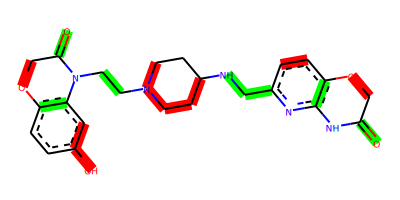

In [36]:
mol = MolFromSmiles("OC1=CC=C2OCC(=O)N(CCN3CCC(CC3)NCC3=CC=C4OCC(=O)NC4=N3)C2=C1") # non-blocker
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

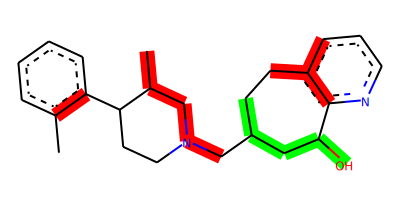

In [37]:
# fourth series
mol = MolFromSmiles("C[C@@H]1CN(C[C@@H]2CCC3=C(N=CC=C3)[C@@H](O)C2)CC[C@H]1C1=CC=CC=C1C") # blocker
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

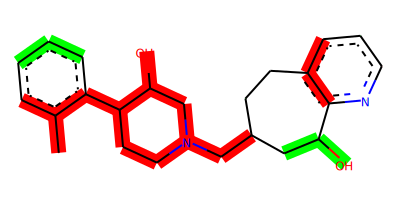

In [38]:
mol = MolFromSmiles("CC1=CC=CC=C1[C@@H]1CCN(C[C@@H]2CCC3=C(N=CC=C3)[C@@H](O)C2)C[C@H]1O") # non-blocker
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

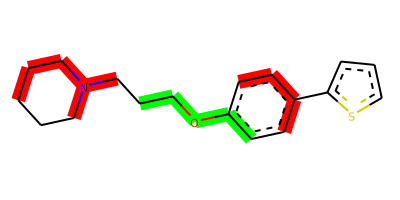

In [39]:
# fifth series
mol = MolFromSmiles("C(COC1=CC=C(C=C1)C1=CC=CS1)CN1CCCCC1") # blocker
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

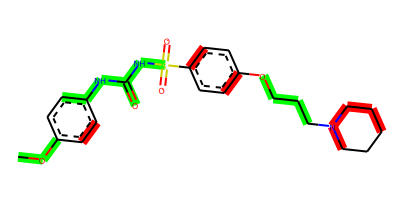

In [40]:
mol = MolFromSmiles("COC1=CC=C(NC(=O)NS(=O)(=O)C2=CC=C(OCCCN3CCCCC3)C=C2)C=C1") # non-blocker
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

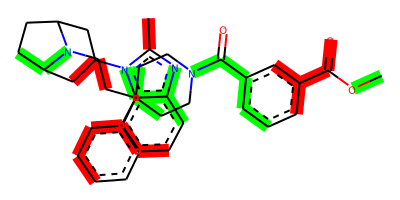

In [46]:
# sixth series
mol = MolFromSmiles("COC(=O)C1=CC=CC(=C1)C(=O)N1CCC(CCN2C3CCC2CC(C3)N2C(C)=NC3=C2C=CC=C3)(CC1)C1=CC=CC=C1") # blocker
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

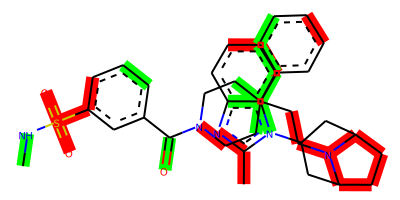

In [45]:
mol = MolFromSmiles("CNS(=O)(=O)C1=CC=CC(=C1)C(=O)N1CCC(CCN2C3CCC2CC(C3)N2C(C)=NC3=C2C=CC=C3)(CC1)C1=CC=CC=C1") # non-blocker
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

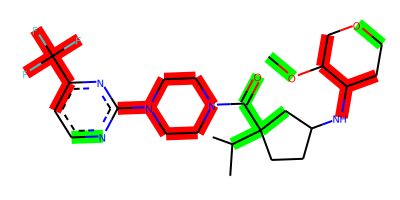

In [54]:
# seventh series
mol = MolFromSmiles('CO[C@@H]1COCC[C@@H]1N[C@@H]1CC[C@@](C(=O)N2CCN(c3nccc(C(F)(F)F)n3)CC2)(C(C)C)C1') # active
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

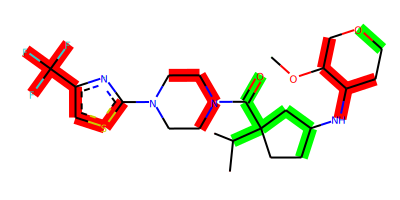

In [53]:
mol = MolFromSmiles('CO[C@@H]1COCC[C@@H]1N[C@@H]1CC[C@@](C(=O)N2CCN(c3nc(C(F)(F)F)cs3)CC2)(C(C)C)C1') # non-active
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

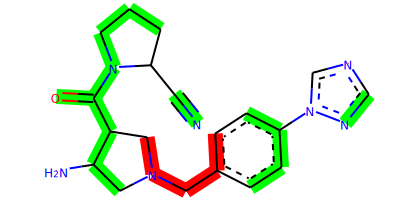

In [55]:
# eighth series
mol = MolFromSmiles('N#C[C@@H]1CCCN1C(=O)[C@@H]1CN(Cc2ccc(-n3cncn3)cc2)C[C@@H]1N')  # active
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

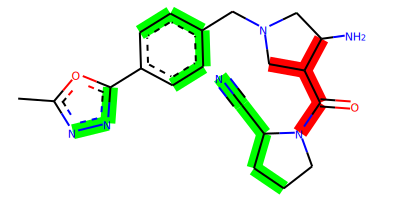

In [56]:
mol = MolFromSmiles('Cc1nnc(-c2ccc(CN3C[C@H](N)[C@H](C(=O)N4CCC[C@H]4C#N)C3)cc2)o1') # non-active
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

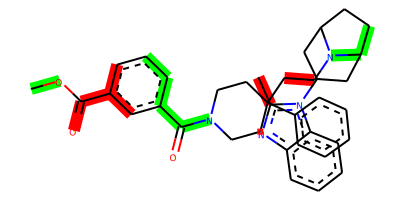

In [58]:
# ninth series
mol = MolFromSmiles('COC(=O)c1cccc(C(=O)N2CCC(CCN3C4CCC3CC(n3c(C)nc5ccccc53)C4)(c3ccccc3)CC2)c1') # blocker
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-3,
                                                      addHs=False)
img

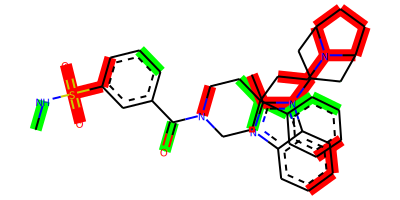

In [62]:
mol = MolFromSmiles('CNS(=O)(=O)c1cccc(C(=O)N2CCC(CCN3C4CCC3CC(n3c(C)nc5ccccc53)C4)(c3ccccc3)CC2)c1') # non-blocker
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

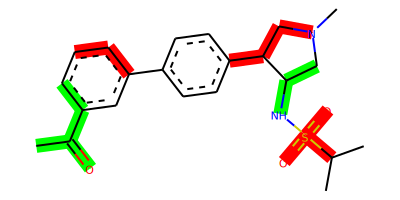

In [63]:
# tenth series
mol = MolFromSmiles('CC(=O)c1cccc(-c2ccc([C@H]3CN(C)C[C@@H]3NS(=O)(=O)C(C)C)cc2)c1') # active
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

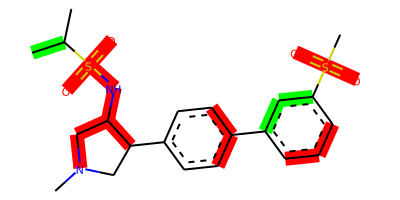

In [64]:
mol = MolFromSmiles('CC(C)S(=O)(=O)N[C@H]1CN(C)C[C@@H]1c1ccc(-c2cccc(S(C)(=O)=O)c2)cc1') # non-active
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

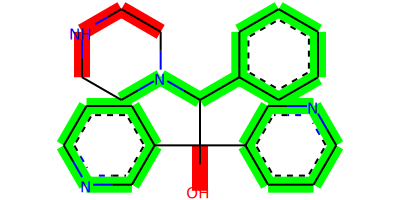

In [69]:
#11th series
mol = MolFromSmiles('OC(c1cccnc1)(c1cccnc1)C(c1ccccc1)N1CCNCC1') # active
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

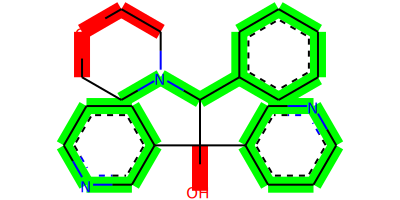

In [70]:
mol = MolFromSmiles('OC(c1cccnc1)(c1cccnc1)C(c1ccccc1)N1CCOCC1') # non-active
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

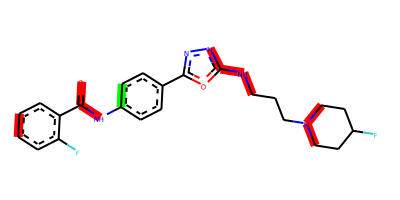

In [82]:
#12th series
mol = MolFromSmiles('O=C(Nc1ccc(-c2nnc(NCCCN3CCC(F)CC3)o2)cc1)c1ccccc1F') # active
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=8e-4,
                                                      addHs=False)
img

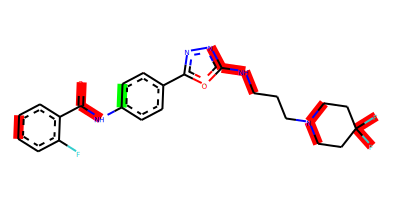

In [85]:
mol = MolFromSmiles('O=C(Nc1ccc(-c2nnc(NCCCN3CCC(F)(F)CC3)o2)cc1)c1ccccc1F') # non-active
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=8e-4,
                                                      addHs=False)
img

### https://www.frontiersin.org/articles/10.3389/fphar.2018.01035/full

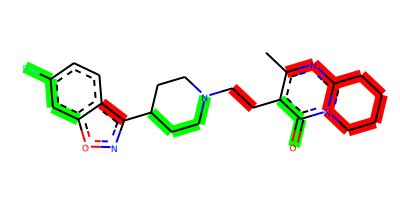

In [47]:
# first series 
mol = MolFromSmiles("CC1=C(CCN2CCC(CC2)C2=NOC3=CC(F)=CC=C23)C(=O)N2CCCCC2=N1") # blocker
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

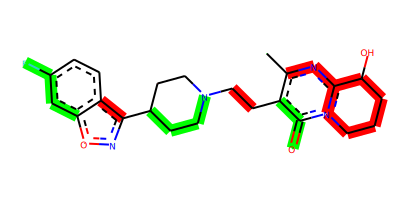

In [48]:
mol = MolFromSmiles("CC1=C(CCN2CCC(CC2)C2=NOC3=CC(F)=CC=C23)C(=O)N2CCCC(O)C2=N1") # non-blocker
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img